# SMS_Spam_Detection:

**The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages, tagged acording being ham (legitimate) or spam.**


* This is the example of Supervised Machine Learning Algorithim.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C://Users/shree/Downloads/spam.csv')

In [3]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
# renaming the columns:
df.rename(columns={"Category":"target","Message":"text"},inplace=True)

In [6]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#here we have numbers so we are using labelencoder

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df["target"] = encoder.fit_transform(df["target"])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#checking missing values:

In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
#checking duplicate values:

In [14]:
df.duplicated().sum()

415

In [15]:
#remove duplicated values:

In [16]:
df = df.drop_duplicates(keep = "first")

In [17]:
df.duplicated().sum()

0

# EDA 

In [18]:
#firstly we check ham and spam message on our dataset:

In [19]:
df["target"].value_counts()

0    4516
1     641
Name: target, dtype: int64

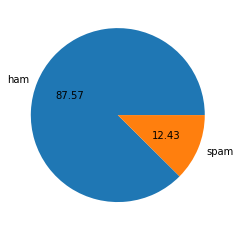

In [20]:
plt.pie(df["target"].value_counts(), labels=["ham","spam"], autopct = "%0.2f")
plt.show()

In [21]:
#data is imbalanced
#here we see in our sms columns how much alphabate, how much words, how much sentence is exist: 

In [22]:
df["num_characters"] = df["text"].apply(len)                            #this length function we give the number of character in message columns

In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
#it is natural language toolkit firstly we will install the library and import the libarary because this libarary text contain libarary for tokenization.
#we want some text columns for future use so in nltk libaries tokenzie package we take and start the opereation.
#tokenzie means breaking the raw data into small piece.

In [25]:
!pip install nltk

In [26]:
import nltk

In [27]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [28]:
#num of words:                       
df["num_word"]= df["text"].apply(lambda x:len(nltk.word_tokenize(x)))                       #lambda function is use for because 

In [29]:
df.head()

,target,text,num_characters,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
#num of sentence:
df["num_sentences"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_word,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[["num_characters", "num_word", "num_sentences"]].describe()                      #this is our ham message columns.

,num_characters,num_word,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.557882,1.950553
std,58.382922,13.406024,1.362981
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [33]:
#firstly here we analyze the ham message columns:

In [34]:
df[df["target"] == 0][["num_characters", "num_word", "num_sentences"]].describe()                                                                     #this is our ham message columns.

,num_characters,num_word,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.264836,1.806244
std,56.708301,13.587852,1.281910
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [35]:
#here we analyze the spam message columns:

In [36]:
df[df["target"] == 1][["num_characters", "num_word", "num_sentences"]].describe()             #this is our spam message column.

,num_characters,num_word,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.967239
std,30.399707,7.103501,1.480241
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


In [37]:
#here we plot the graph for our hame meaasge and spam message by using histogram:

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

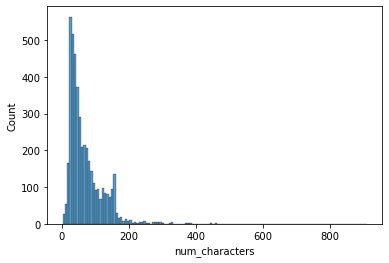

In [38]:
sns.histplot(df[df["target"]== 0]["num_characters"])                        #this is our ham message histplot for num_characters this column 

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

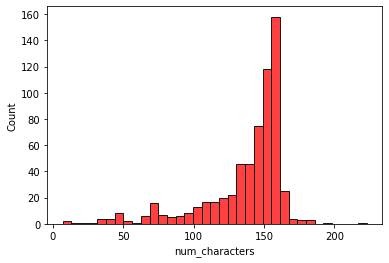

In [39]:
sns.histplot(df[df["target"]== 1]["num_characters"], color="red")    #this is our spam message histplotfor num_characters this column

In [40]:
#combining this plot ham and spam message using histplot for num_characters this column:

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

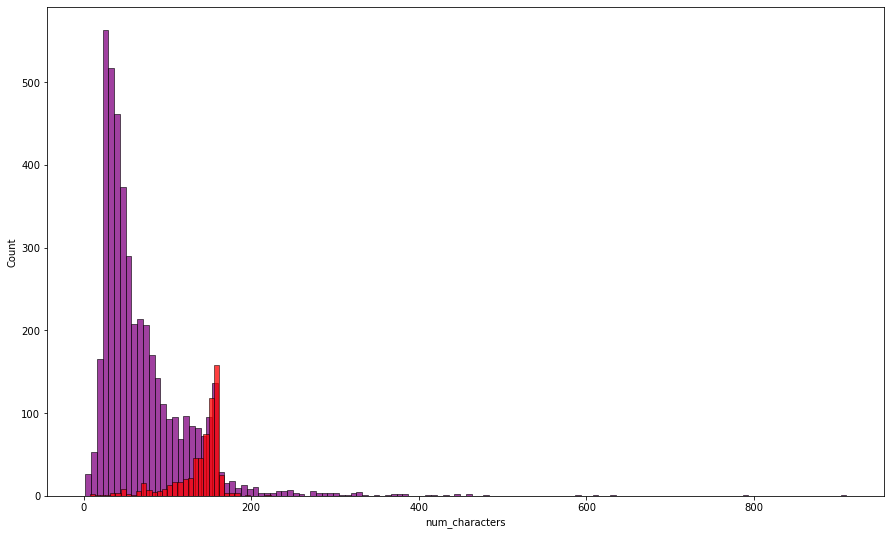

In [41]:
plt.figure(figsize=(15,9))
sns.histplot(df[df["target"]== 0]["num_characters"],color="purple")
sns.histplot(df[df["target"]== 1]["num_characters"], color="red")

In [42]:
#combining this plot ham and spam message using histplot for num_word  this column:

<AxesSubplot:xlabel='num_word', ylabel='Count'>

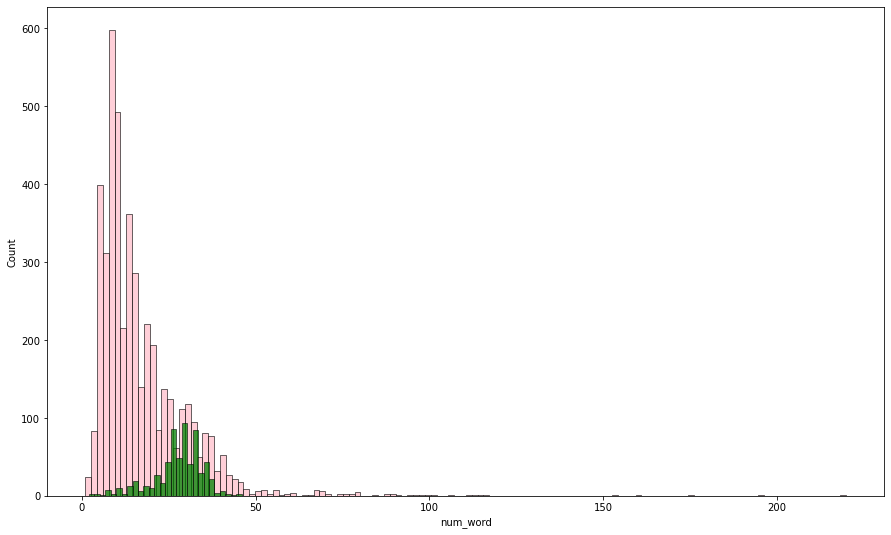

In [43]:
plt.figure(figsize=(15,9))
sns.histplot(df[df["target"]== 0]["num_word"],color="pink")
sns.histplot(df[df["target"]== 1]["num_word"], color="green")

In [44]:
#combining this plot ham and spam message using histplot for num_sentences this column:

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

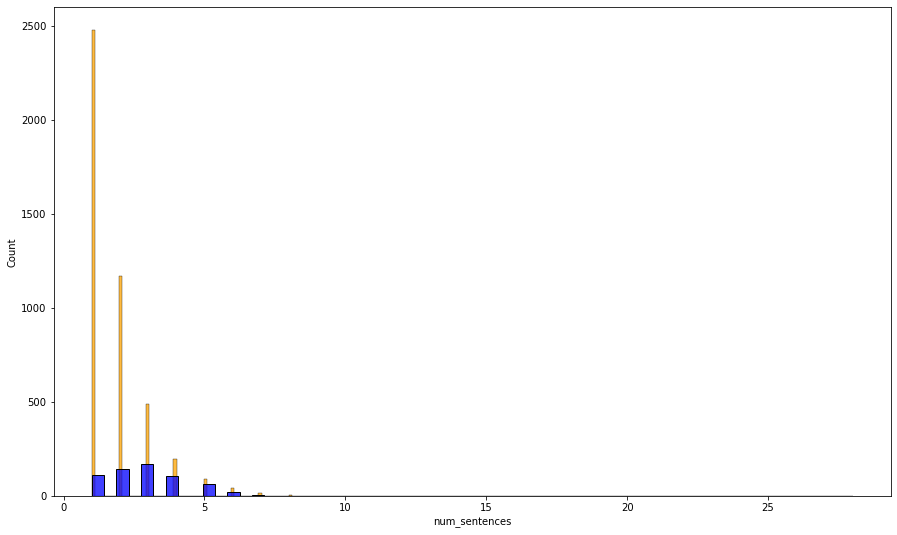

In [45]:
plt.figure(figsize=(15,9))
sns.histplot(df[df["target"]== 0]["num_sentences"],color="orange")
sns.histplot(df[df["target"]== 1]["num_sentences"], color="blue")

In [46]:
#here we see the reationship between no of sentence to the number of words this reationship plot by using a pairplot.

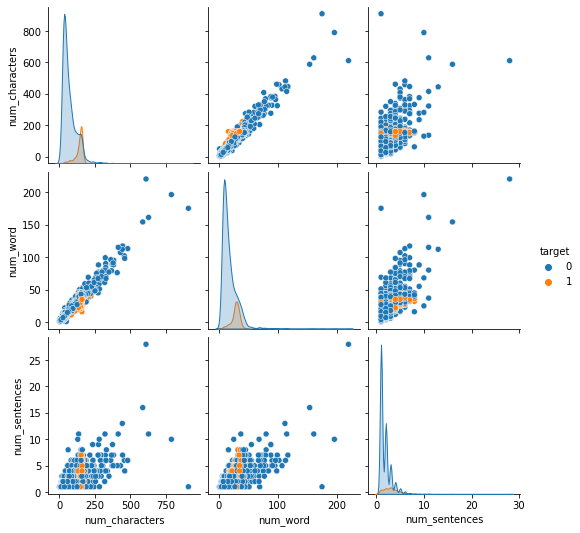

In [47]:
sns.pairplot(df, hue="target")

In [48]:
#here we calculate the correaltion of coeeficient and heatmap.

<AxesSubplot:>

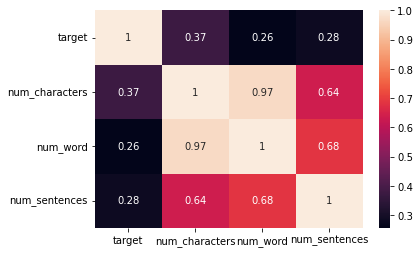

In [49]:
sns.heatmap(df.corr(), annot=True)

In [50]:
#after this EDA part we will se the what the top most word using in ham and spam message for that we will Data Preprocessing opreation perform:
#in the Data Preprocessing our dataset is the textual format so it is also called as textual data.
#in textual preprocessing we perform follwing opreation:


In [51]:
def transform_text(text):                                                                 #this function is lower case opreation.
    text = text.lower()
    text = nltk.word_tokenize(text)                                                       # this line function is tokenize means
    
    
    
    y = []                                                                                #this loop is removing special character 
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]                                                                                        # list cloening
    y.clear()
    
    for i in text:                                                                           #here first we import the nltk libarary and we import the package of nltk libarary stopword and string puncuation because of this line is said that remove stopwords and string puncutattion.
        if i not in stopwords.words("english") and i not in string.punctuation:  
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:                                                                           #here we perform stemming because stemming gives root format to the word
        y.append(ps.stem(i))
            
            
            
    return " ".join(y)

In [52]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [53]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [54]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [55]:
df["text"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [56]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [57]:
#here we create new column for transformation

In [58]:
df["transformed_text"] = df["text"].apply(transform_text)

In [59]:
df.head()

,target,text,num_characters,num_word,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [60]:
#here we see top 30 words which is used  ham and spam by using a  barplot.

In [61]:
spam_corpus = []
for msg in df[df["target"] == 1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    

In [62]:
from collections import Counter                                       #here we taking collection library and import counter
Counter(spam_corpus).most_common(30)                                                  # here in the line making new dicitionary and in our corpus give the information of each word

[('call', 311),
 ('free', 186),
 ('2', 154),
 ('txt', 139),
 ('text', 122),
 ('ur', 119),
 ('u', 115),
 ('mobil', 110),
 ('stop', 108),
 ('repli', 103),
 ('claim', 96),
 ('4', 95),
 ('prize', 78),
 ('get', 73),
 ('new', 64),
 ('servic', 64),
 ('send', 60),
 ('tone', 59),
 ('urgent', 56),
 ('award', 55),
 ('nokia', 54),
 ('contact', 53),
 ('phone', 52),
 ('cash', 50),
 ('pleas', 50),
 ('week', 48),
 ('win', 46),
 ('min', 45),
 ('c', 43),
 ('guarante', 42)]

In [63]:
#after that all this 30 words we converting into DataFrame:

In [64]:
from collections import Counter                                       
pd.DataFrame(Counter(spam_corpus).most_common(30))                                                 

,0,1
0,call,311
1,free,186
2,2,154
3,txt,139
4,text,122
5,ur,119
6,u,115
7,mobil,110
8,stop,108
9,repli,103


In [65]:
#after that we are ploting a barplot our this 30 words Dataframe.

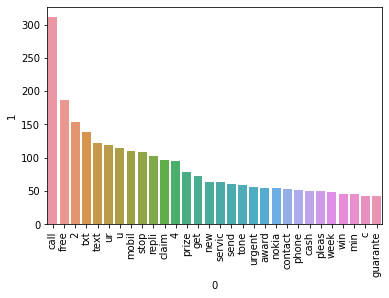

In [66]:
from collections import Counter                                       
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

# Ham:

In [67]:
spam_corpus = []
for msg in df[df["target"] == 0]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    

In [68]:
from collections import Counter 
Counter(spam_corpus).most_common(30)

[('u', 897),
 ('go', 407),
 ('get', 351),
 ('2', 288),
 ('gt', 288),
 ('lt', 287),
 ('come', 278),
 ('got', 239),
 ('know', 237),
 ('like', 236),
 ('call', 235),
 ('love', 222),
 ('time', 220),
 ('ok', 218),
 ('good', 215),
 ('want', 209),
 ('ur', 203),
 ('day', 195),
 ('ü', 173),
 ('need', 171),
 ('one', 166),
 ('4', 162),
 ('lor', 159),
 ('home', 152),
 ('think', 150),
 ('see', 148),
 ('take', 144),
 ('still', 144),
 ('da', 138),
 ('tell', 133)]

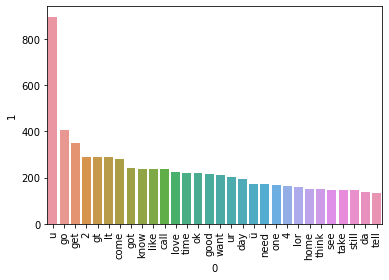

In [69]:
from collections import Counter                                       
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

# Model Building:

In [70]:
#we know that the Naïve Bayes alogeithim is best for categorical dataset so firstly we will model built on Naïve Bayes algorithim. 

In [71]:
#here our input is transformed_text and output is target but model building we want a input in numeric format so we will our input column conver into vector format.

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()


In [91]:
x = cv.fit_transform(df["transformed_text"]).toarray()

In [92]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [93]:
y = df["target"].values

In [94]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [97]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [98]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [99]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8675710594315246
[[1173  178]
 [  27  170]]
0.4885057471264368


In [100]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9786821705426356
[[1336   15]
 [  18  179]]
0.9226804123711341


In [101]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9722222222222222
[[1348    3]
 [  40  157]]
0.98125


In [102]:
#here we choose bernoulie because in our data is imbalnced so in this case our precesion score is very important and our bnb give a good precesion so we choose bnb.

In [103]:
#here we check different algorithim:

In [104]:
from sklearn.linear_model import LogisticRegression                                #import differnt type of algorithim
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [111]:
svc = SVC()
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier() 

In [106]:
#here we create different type of dicitioneries because it is useful for function

In [112]:
clfs = {
    "SVC" : svc,
    "KN" : knc,
    "NB": mnb,
    "DT" : dtc,
    "LR" : lrc,
    "RF" : rfc,
    "AdaBoost" : abc,
    "BC" : bc,
    "GBC" : gbc,
    "XGB" : xgb
}

In [113]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precesion = precision_score(y_test,y_pred)
    return accuracy,precesion

In [114]:
train_classifier(dtc, x_train,y_train,x_test,y_test)                              #here we give decesion tree good accuracy and precesion

(0.9502583979328165, 0.8896103896103896)

In [115]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precesion - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9631782945736435
Precesion -  0.9929577464788732
For  KN
Accuracy -  0.9050387596899225
Precesion -  1.0
For  NB
Accuracy -  0.9786821705426356
Precesion -  0.9226804123711341
For  DT
Accuracy -  0.9547803617571059
Precesion -  0.9044585987261147
For  LR
Accuracy -  0.9760981912144703
Precesion -  0.9819277108433735
For  RF
Accuracy -  0.9689922480620154
Precesion -  1.0
For  AdaBoost
Accuracy -  0.960594315245478
Precesion -  0.930379746835443
For  BC
Accuracy -  0.9567183462532299
Precesion -  0.9642857142857143
For  GBC
Accuracy -  0.9580103359173127
Precesion -  0.9925373134328358
For  XGB
Accuracy -  0.9702842377260982
Precesion -  0.9467455621301775


In [116]:
predictions = clf.predict(x_test)                                                   #this is our classification report.

In [117]:
from sklearn.metrics import classification_report

In [118]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1351
           1       0.95      0.81      0.87       197

    accuracy                           0.97      1548
   macro avg       0.96      0.90      0.93      1548
weighted avg       0.97      0.97      0.97      1548



In [119]:
 #and here we convert our all the algorithim accuracy into dataframe for easy understanding:

In [120]:
performance_df = pd.DataFrame({"Algorithim":clfs.keys(),"Accuracy":accuracy_scores,"precesion":precision_scores})

In [121]:
performance_df

,Algorithim,Accuracy,precesion
0,SVC,0.963178,0.992958
1,KN,0.905039,1.000000
2,NB,0.978682,0.922680
3,DT,0.954780,0.904459
4,LR,0.976098,0.981928
5,RF,0.968992,1.000000
6,AdaBoost,0.960594,0.930380
7,BC,0.956718,0.964286
8,GBC,0.958010,0.992537
9,XGB,0.970284,0.946746


In [122]:
performannce_df1 = pd.melt(performance_df, id_vars = "Algorithim")

In [123]:
performannce_df1

,Algorithim,variable,value
0,SVC,Accuracy,0.963178
1,KN,Accuracy,0.905039
2,NB,Accuracy,0.978682
3,DT,Accuracy,0.954780
4,LR,Accuracy,0.976098
5,RF,Accuracy,0.968992
6,AdaBoost,Accuracy,0.960594
7,BC,Accuracy,0.956718
8,GBC,Accuracy,0.958010
9,XGB,Accuracy,0.970284


In [124]:
#here we represent our accuracy and precesion through the visulazation:

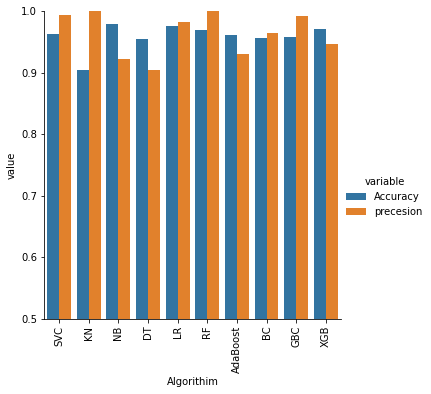

In [125]:
sns.catplot(x = "Algorithim", y= "value",
               hue = "variable", data=performannce_df1, kind="bar", height=5)

plt.ylim(0.5,1.0)
plt.xticks(rotation= "vertical")
plt.show()

In [159]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)


In [160]:
x = tfidf.fit_transform(df["transformed_text"]).toarray()

In [161]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [162]:
y = df["target"].values

In [163]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [164]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [165]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8630490956072352
[[1167  184]
 [  28  169]]
0.47875354107648727


In [166]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9715762273901809
[[1351    0]
 [  44  153]]
1.0


In [167]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9806201550387597
[[1348    3]
 [  27  170]]
0.9826589595375722


In [168]:
from sklearn.linear_model import LogisticRegression                                #import differnt type of algorithim
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [169]:
svc = SVC()
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier() 

In [170]:
clfs = {
    "SVC" : svc,
    "KN" : knc,
    "NB": mnb,
    "DT" : dtc,
    "LR" : lrc,
    "RF" : rfc,
    "AdaBoost" : abc,
    "BC" : bc,
    "GBC" : gbc,
    "XGB" : xgb
}                  

In [171]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precesion = precision_score(y_test,y_pred)
    return accuracy,precesion

In [172]:
train_classifier(dtc, x_train,y_train,x_test,y_test)                              #here we give decesion tree good accuracy and precesion

(0.9483204134366925, 0.8162162162162162)

In [173]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precesion - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9696382428940569
Precesion -  1.0
For  KN
Accuracy -  0.9063307493540051
Precesion -  1.0
For  NB
Accuracy -  0.9715762273901809
Precesion -  1.0
For  DT
Accuracy -  0.9437984496124031
Precesion -  0.8235294117647058
For  LR
Accuracy -  0.9541343669250646
Precesion -  0.9772727272727273
For  RF
Accuracy -  0.9683462532299741
Precesion -  1.0
For  AdaBoost
Accuracy -  0.9599483204134367
Precesion -  0.9041916167664671
For  BC
Accuracy -  0.9580103359173127
Precesion -  0.8928571428571429
For  GBC
Accuracy -  0.9567183462532299
Precesion -  0.9642857142857143
For  XGB
Accuracy -  0.9709302325581395
Precesion -  0.9634146341463414


In [174]:
predictions = clf.predict(x_test)                                                   #this is our classification report.

In [175]:
from sklearn.metrics import classification_report

In [176]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1351
           1       0.96      0.80      0.88       197

    accuracy                           0.97      1548
   macro avg       0.97      0.90      0.93      1548
weighted avg       0.97      0.97      0.97      1548



In [177]:
performance_df = pd.DataFrame({"Algorithim":clfs.keys(),"Accuracy":accuracy_scores,"precesion":precision_scores})

In [178]:
performance_df

,Algorithim,Accuracy,precesion
0,SVC,0.969638,1.000000
1,KN,0.906331,1.000000
2,NB,0.971576,1.000000
3,DT,0.943798,0.823529
4,LR,0.954134,0.977273
5,RF,0.968346,1.000000
6,AdaBoost,0.959948,0.904192
7,BC,0.958010,0.892857
8,GBC,0.956718,0.964286
9,XGB,0.970930,0.963415


In [179]:
performannce_df1 = pd.melt(performance_df, id_vars = "Algorithim")

In [180]:
performannce_df1

,Algorithim,variable,value
0,SVC,Accuracy,0.969638
1,KN,Accuracy,0.906331
2,NB,Accuracy,0.971576
3,DT,Accuracy,0.943798
4,LR,Accuracy,0.954134
5,RF,Accuracy,0.968346
6,AdaBoost,Accuracy,0.959948
7,BC,Accuracy,0.958010
8,GBC,Accuracy,0.956718
9,XGB,Accuracy,0.970930


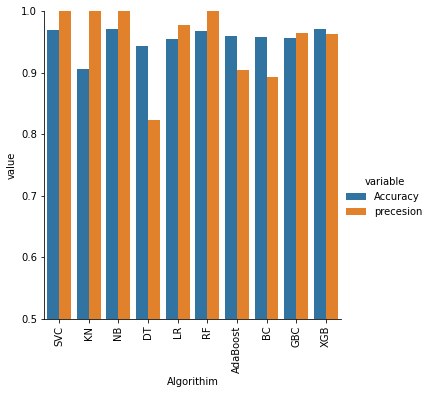

In [181]:
sns.catplot(x = "Algorithim", y= "value",
               hue = "variable", data=performannce_df1, kind="bar", height=5)

plt.ylim(0.5,1.0)
plt.xticks(rotation= "vertical")
plt.show();

In [182]:
#here we imporving model by using hyperprymeter scaling.

In [183]:
temp_df =  pd.DataFrame({"Algorithim":clfs.keys(),"Accuracy":accuracy_scores,"precesion_max_features":precision_scores})

In [184]:
performance_df.merge(temp_df,on="Algorithim")

,Algorithim,Accuracy_x,precesion,Accuracy_y,precesion_max_features
0,SVC,0.969638,1.000000,0.969638,1.000000
1,KN,0.906331,1.000000,0.906331,1.000000
2,NB,0.971576,1.000000,0.971576,1.000000
3,DT,0.943798,0.823529,0.943798,0.823529
4,LR,0.954134,0.977273,0.954134,0.977273
5,RF,0.968346,1.000000,0.968346,1.000000
6,AdaBoost,0.959948,0.904192,0.959948,0.904192
7,BC,0.958010,0.892857,0.958010,0.892857
8,GBC,0.956718,0.964286,0.956718,0.964286
9,XGB,0.970930,0.963415,0.970930,0.963415


In [185]:
#here we perform a slicing.

In [186]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [188]:
new_df =  pd.DataFrame({"Algorithim":clfs.keys(),"Accuracy_scaling":accuracy_scores,"precesion_scaling":precision_scores})

In [189]:
new_df_scaled = new_df.merge(temp_df,on="Algorithim")

In [190]:
new_df_scaled

,Algorithim,Accuracy_scaling,precesion_scaling,Accuracy,precesion_max_features
0,SVC,0.969638,1.000000,0.969638,1.000000
1,KN,0.906331,1.000000,0.906331,1.000000
2,NB,0.971576,1.000000,0.971576,1.000000
3,DT,0.943798,0.823529,0.943798,0.823529
4,LR,0.954134,0.977273,0.954134,0.977273
5,RF,0.968346,1.000000,0.968346,1.000000
6,AdaBoost,0.959948,0.904192,0.959948,0.904192
7,BC,0.958010,0.892857,0.958010,0.892857
8,GBC,0.956718,0.964286,0.956718,0.964286
9,XGB,0.970930,0.963415,0.970930,0.963415


# Conclusion:

* Dataset name is SMS detection systm this dataset is totally textual dataset so this is most challenging dataset to create best model.
* and this supervised learning algorithim
* firstly we cleaning a data after that we performin EDA in our EDA is most important because we visulize data perforam and create some function and opreate the function.
* after that we will run feature engineering part after that model building part we will run and after that model eveulation.
* and deseciding which alogirithim is best for our model.

                          **Thank-You**